# Ford GoBike System Data


## Table of Contents
- [Introduction](#intro)
- [Data Assessing](#assess)
- [Data Cleaning](#clean)
- [Data Visualization](#visualiz)
     * [Univariate Exploration](#uni)
     * [Bivariate Exploration](#bi)
     * [Multivariate Exploration](#multi)
- [Conclusion](#conc)


-------
<a id='intro'></a>
## Introduction

Ford GoBike Data set is Lyft dataset for their public bicycle sharing system. The project is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. (Wiki)
As it's expands it reaches many places. This dataset was collected from New york city in June, 2020.

This data answers questions like: Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on?
This data exploration help you discover the answers to these questions and more. 

This data is provided according to the NYCBS Data Use Policy.
>https://www.citibikenyc.com/system-data


****

In [58]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [59]:
df = pd.read_csv("JC-202006-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,122,2020-06-01 00:02:21.7500,2020-06-01 00:04:24.3250,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489,Subscriber,1987,1
1,1282,2020-06-01 00:12:27.1090,2020-06-01 00:33:50.0540,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183,Subscriber,1988,1
2,186,2020-06-01 01:19:59.2090,2020-06-01 01:23:05.8930,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140,Subscriber,1987,1
3,131,2020-06-01 01:26:42.2050,2020-06-01 01:28:53.8040,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120,Subscriber,1987,1
4,266,2020-06-01 01:27:33.7090,2020-06-01 01:32:00.1890,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437,Subscriber,1972,2


In [60]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36921 entries, 0 to 36920
Data columns (total 15 columns):
tripduration               36921 non-null int64
starttime                  36921 non-null object
stoptime                   36921 non-null object
start station id           36921 non-null int64
start station name         36921 non-null object
start station latitude     36921 non-null float64
start station longitude    36921 non-null float64
end station id             36921 non-null int64
end station name           36921 non-null object
end station latitude       36921 non-null float64
end station longitude      36921 non-null float64
bikeid                     36921 non-null int64
usertype                   36921 non-null object
birth year                 36921 non-null int64
gender                     36921 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 4.2+ MB
None
       tripduration  start station id  start station latitude  \
count  3.692100e+04      3

*****
<a id='assess'></a>
# Data Assessing 

In [61]:
#Making a copy for the cleaning purposes
trips = df.copy()
trips.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
27175,7010,2020-06-23 16:23:09.1470,2020-06-23 18:19:59.7010,3281,Leonard Gordon Park,40.745910,-74.057271,3210,Pershing Field,40.742677,-74.051789,44241,Customer,1969,0
24085,867,2020-06-21 09:24:37.4180,2020-06-21 09:39:04.8810,3202,Newport PATH,40.727224,-74.033759,3185,City Hall,40.717733,-74.043845,42350,Subscriber,1989,1
27917,430,2020-06-23 22:52:49.1460,2020-06-23 22:59:59.7340,3269,Brunswick & 6th,40.726012,-74.050389,3202,Newport PATH,40.727224,-74.033759,42545,Subscriber,1984,1
10228,3224,2020-06-10 14:54:55.5920,2020-06-10 15:48:39.9260,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,42602,Customer,1986,2
26226,3452,2020-06-22 18:21:08.9080,2020-06-22 19:18:41.3930,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42444,Subscriber,1991,1
7697,3057,2020-06-08 09:45:27.6880,2020-06-08 10:36:25.5660,3191,Union St,40.718211,-74.083639,3191,Union St,40.718211,-74.083639,40063,Customer,1969,0
4145,2372,2020-06-06 09:33:44.6690,2020-06-06 10:13:17.0700,3678,Fairmount Ave,40.725726,-74.071959,3678,Fairmount Ave,40.725726,-74.071959,42274,Customer,1969,0
19608,9880,2020-06-17 19:52:00.0510,2020-06-17 22:36:40.7330,3211,Newark Ave,40.721525,-74.046305,3211,Newark Ave,40.721525,-74.046305,42229,Subscriber,1984,2
18603,3455,2020-06-16 21:47:12.8790,2020-06-16 22:44:48.6740,3639,Harborside,40.719252,-74.034234,3639,Harborside,40.719252,-74.034234,42379,Subscriber,1971,2
25239,936,2020-06-21 19:35:58.5580,2020-06-21 19:51:34.7810,3198,Heights Elevator,40.748716,-74.040443,3638,Washington St,40.724294,-74.035483,42485,Subscriber,1982,1


In [62]:
trips.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [63]:
#checking duplicates in the data 
trips.duplicated().sum()

0

In [64]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36921 entries, 0 to 36920
Data columns (total 15 columns):
tripduration               36921 non-null int64
starttime                  36921 non-null object
stoptime                   36921 non-null object
start station id           36921 non-null int64
start station name         36921 non-null object
start station latitude     36921 non-null float64
start station longitude    36921 non-null float64
end station id             36921 non-null int64
end station name           36921 non-null object
end station latitude       36921 non-null float64
end station longitude      36921 non-null float64
bikeid                     36921 non-null int64
usertype                   36921 non-null object
birth year                 36921 non-null int64
gender                     36921 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 4.2+ MB


In [65]:
trips.gender.value_counts()

1    19181
2     9826
0     7914
Name: gender, dtype: int64

In [66]:
trips.usertype.value_counts()

Subscriber    19825
Customer      17096
Name: usertype, dtype: int64

In [67]:
trips['start station name'].value_counts()

Newport Pkwy                  2604
Liberty Light Rail            2589
Grove St PATH                 1819
Hamilton Park                 1694
Columbus Dr at Exchange Pl    1589
Harborside                    1481
Marin Light Rail              1459
JC Medical Center             1223
Newport PATH                  1143
Paulus Hook                   1141
City Hall                     1061
Sip Ave                       1025
Morris Canal                  1006
Washington St                  933
Warren St                      919
Newark Ave                     898
Lincoln Park                   888
Van Vorst Park                 801
Columbus Drive                 796
Hoboken Ave at Monmouth St     642
Grand St                       632
Jersey & 3rd                   632
Baldwin at Montgomery          546
McGinley Square                533
Manila & 1st                   521
Heights Elevator               508
Jersey & 6th St                484
Hilltop                        457
Brunswick St        

<a id='clean'></a>
# Data Cleaning  

**Changing data types of columns with mistaken data types**

In [68]:
#Converting columns data typs functions 
def category_convert (df, columns):
    for column in columns:
        df[column] = df[column].astype('category')
    return df

def string_convert (df, columns):
    for column in columns:
        df[column] = df[column].astype('str')
    return df

def time_convert (df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df


In [69]:
#change catrgorial column data type
trips = category_convert (trips, ['gender', 'usertype'])

#test the code
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36921 entries, 0 to 36920
Data columns (total 15 columns):
tripduration               36921 non-null int64
starttime                  36921 non-null object
stoptime                   36921 non-null object
start station id           36921 non-null int64
start station name         36921 non-null object
start station latitude     36921 non-null float64
start station longitude    36921 non-null float64
end station id             36921 non-null int64
end station name           36921 non-null object
end station latitude       36921 non-null float64
end station longitude      36921 non-null float64
bikeid                     36921 non-null int64
usertype                   36921 non-null category
birth year                 36921 non-null int64
gender                     36921 non-null category
dtypes: category(2), float64(4), int64(5), object(4)
memory usage: 3.7+ MB
None


In [70]:
#change string column data type
trips = string_convert (trips, ['start station id', 'end station id'])

#test the code
print(trips.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36921 entries, 0 to 36920
Data columns (total 15 columns):
tripduration               36921 non-null int64
starttime                  36921 non-null object
stoptime                   36921 non-null object
start station id           36921 non-null object
start station name         36921 non-null object
start station latitude     36921 non-null float64
start station longitude    36921 non-null float64
end station id             36921 non-null object
end station name           36921 non-null object
end station latitude       36921 non-null float64
end station longitude      36921 non-null float64
bikeid                     36921 non-null int64
usertype                   36921 non-null category
birth year                 36921 non-null int64
gender                     36921 non-null category
dtypes: category(2), float64(4), int64(3), object(6)
memory usage: 3.7+ MB
None


In [71]:
#change time column data type
trips = time_convert (trips, ['starttime', 'stoptime'])

#test the code
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36921 entries, 0 to 36920
Data columns (total 15 columns):
tripduration               36921 non-null int64
starttime                  36921 non-null datetime64[ns]
stoptime                   36921 non-null datetime64[ns]
start station id           36921 non-null object
start station name         36921 non-null object
start station latitude     36921 non-null float64
start station longitude    36921 non-null float64
end station id             36921 non-null object
end station name           36921 non-null object
end station latitude       36921 non-null float64
end station longitude      36921 non-null float64
bikeid                     36921 non-null int64
usertype                   36921 non-null category
birth year                 36921 non-null int64
gender                     36921 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 3.7+ MB
None


**Calculating age from the given birth year**

In [72]:
#adding age column
from datetime import datetime
currentYear = datetime.now().year
now = pd.Timestamp('now')
trips['age'] = currentYear - trips['birth year']

#test the code
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,122,2020-06-01 00:02:21.750,2020-06-01 00:04:24.325,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489,Subscriber,1987,1,33
1,1282,2020-06-01 00:12:27.109,2020-06-01 00:33:50.054,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183,Subscriber,1988,1,32
2,186,2020-06-01 01:19:59.209,2020-06-01 01:23:05.893,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140,Subscriber,1987,1,33
3,131,2020-06-01 01:26:42.205,2020-06-01 01:28:53.804,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120,Subscriber,1987,1,33
4,266,2020-06-01 01:27:33.709,2020-06-01 01:32:00.189,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437,Subscriber,1972,2,48


**Convering gender column from numerical format to gender categories** 

In [73]:
#convering Gender column to strings 
trips['gender'] = trips['gender'].map({0: 'unknown', 1: 'male', 2:'female'})

#test the code 
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,122,2020-06-01 00:02:21.750,2020-06-01 00:04:24.325,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489,Subscriber,1987,male,33
1,1282,2020-06-01 00:12:27.109,2020-06-01 00:33:50.054,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183,Subscriber,1988,male,32
2,186,2020-06-01 01:19:59.209,2020-06-01 01:23:05.893,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140,Subscriber,1987,male,33
3,131,2020-06-01 01:26:42.205,2020-06-01 01:28:53.804,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120,Subscriber,1987,male,33
4,266,2020-06-01 01:27:33.709,2020-06-01 01:32:00.189,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437,Subscriber,1972,female,48


In [74]:
#recheck the gender column 
trips.gender.value_counts()

male       19181
female      9826
unknown     7914
Name: gender, dtype: int64

**Caluculating the distance traveled by users from:**
https://gist.github.com/rochacbruno/2883505

In [75]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [76]:
#adding the distance column by the function distance 
trips['distance(km)'] = trips.apply(lambda x: distance((x['start station latitude'], x['start station longitude']), (x['end station latitude'], x['end station longitude'])), axis=1)

In [77]:
trips['distance(m)'] = trips['distance(km)'] *1000

In [78]:
#testing the code 
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,distance(km),distance(m)
0,122,2020-06-01 00:02:21.750,2020-06-01 00:04:24.325,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489,Subscriber,1987,male,33,0.290756,290.756404
1,1282,2020-06-01 00:12:27.109,2020-06-01 00:33:50.054,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183,Subscriber,1988,male,32,3.800562,3800.562000
2,186,2020-06-01 01:19:59.209,2020-06-01 01:23:05.893,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140,Subscriber,1987,male,33,0.368244,368.244469
3,131,2020-06-01 01:26:42.205,2020-06-01 01:28:53.804,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120,Subscriber,1987,male,33,0.314876,314.876084
4,266,2020-06-01 01:27:33.709,2020-06-01 01:32:00.189,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437,Subscriber,1972,female,48,0.749587,749.586682


**Calculating the day of each trip**

help from: https://stackoverflow.com/questions/29096381/num-day-to-name-day-with-pandas

In [79]:
#extracting the days on the month 
trips['day'] =trips['starttime'].dt.strftime('%a')

#test the code
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,distance(km),distance(m),day
0,122,2020-06-01 00:02:21.750,2020-06-01 00:04:24.325,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3639,Harborside,40.719252,-74.034234,42489,Subscriber,1987,male,33,0.290756,290.756404,Mon
1,1282,2020-06-01 00:12:27.109,2020-06-01 00:33:50.054,3198,Heights Elevator,40.748716,-74.040443,3276,Marin Light Rail,40.714584,-74.042817,42183,Subscriber,1988,male,32,3.800562,3800.562000,Mon
2,186,2020-06-01 01:19:59.209,2020-06-01 01:23:05.893,3275,Columbus Drive,40.718355,-74.038914,3681,Grand St,40.715178,-74.037683,42140,Subscriber,1987,male,33,0.368244,368.244469,Mon
3,131,2020-06-01 01:26:42.205,2020-06-01 01:28:53.804,3267,Morris Canal,40.712419,-74.038526,3681,Grand St,40.715178,-74.037683,42120,Subscriber,1987,male,33,0.314876,314.876084,Mon
4,266,2020-06-01 01:27:33.709,2020-06-01 01:32:00.189,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,42437,Subscriber,1972,female,48,0.749587,749.586682,Mon


In [80]:
#Check the whole clean dataframe 
trips.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,distance(km),distance(m),day
17412,2571,2020-06-15 20:54:26.715,2020-06-15 21:37:18.582,3211,Newark Ave,40.721525,-74.046305,3205,JC Medical Center,40.716540,-74.049638,42212,Subscriber,1989,male,31,0.621466,621.466298,Mon
34545,208,2020-06-28 22:42:51.083,2020-06-28 22:46:19.210,3205,JC Medical Center,40.716540,-74.049638,3211,Newark Ave,40.721525,-74.046305,42552,Customer,1999,female,21,0.621466,621.466298,Sun
3055,1673,2020-06-04 18:06:40.141,2020-06-04 18:34:34.131,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,42492,Customer,1969,unknown,51,0.000000,0.000000,Thu
10216,219,2020-06-10 14:47:06.641,2020-06-10 14:50:46.157,3192,Liberty Light Rail,40.711242,-74.055701,3268,Lafayette Park,40.713464,-74.062859,42173,Subscriber,1977,male,43,0.651864,651.864161,Wed
22996,1328,2020-06-20 15:27:36.141,2020-06-20 15:49:44.151,3269,Brunswick & 6th,40.726012,-74.050389,3639,Harborside,40.719252,-74.034234,42370,Customer,1991,male,29,1.555140,1555.139613,Sat
9055,8685,2020-06-09 14:31:21.721,2020-06-09 16:56:07.438,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,35358,Customer,1969,unknown,51,0.356653,356.652934,Tue
34883,1229,2020-06-29 11:55:08.804,2020-06-29 12:15:38.550,3639,Harborside,40.719252,-74.034234,3193,Lincoln Park,40.724605,-74.078406,42128,Subscriber,1975,male,45,3.769794,3769.794431,Mon
8793,944,2020-06-09 08:28:54.114,2020-06-09 08:44:38.674,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,42609,Subscriber,1966,male,54,0.000000,0.000000,Tue
10522,292,2020-06-10 18:16:21.222,2020-06-10 18:21:13.578,3184,Paulus Hook,40.714145,-74.033552,3275,Columbus Drive,40.718355,-74.038914,42375,Subscriber,1993,male,27,0.650684,650.683680,Wed
11794,2378,2020-06-12 00:21:05.897,2020-06-12 01:00:44.479,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,42369,Customer,1997,male,23,0.000000,0.000000,Fri


<a id='visualiz'></a>
# Data Visualization

### The structure of the dataset

> * Trip Duration (seconds) 
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Latitude 
* Station Langituide 
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (Male, Female, unknown)
* Year of Birth
* Age
* Distance (m)
* Day
### Main features of interest in the dataset

> * Gender of users
* Distance travelled by each user
* Age of the users 
* User type 
* Trip duration 
### Features in the dataset that will help support the investigation into the features of interest

> * The relationship between the age of users and thier type of th user. Also the type of the user and the trip duration. The Type of the user and the distance traveled. The trip duration and distance 

<a id='uni'></a>

## Univariate Exploration

>investigating distributions of individual variables, removing outliers, cleaning up and preparing for relationships between variables. 

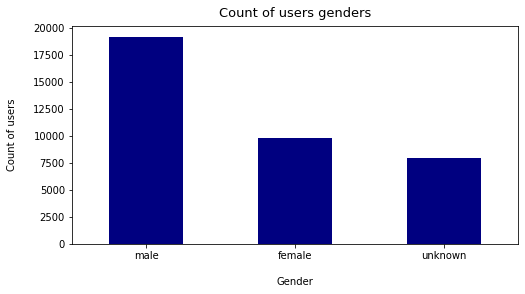

In [81]:
trips['gender'].value_counts().plot(kind='bar', figsize=(8,4),color='navy')
plt.title('Count of users genders', fontsize=13, y=1.015)
plt.xlabel('Gender', labelpad=16)
plt.ylabel('Count of users', labelpad=16)
plt.xticks(rotation=360);

**Finding 1:** Males are the most users of the bike sharing system among genders

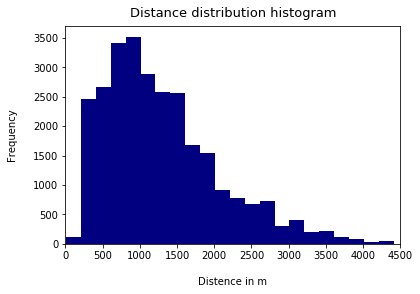

In [82]:
bin_edges = np.arange(10, trips['distance(m)'].max()+10, 200)
plt.hist(data = trips, x = 'distance(m)', bins = bin_edges, color='navy');
plt.title('Distance distribution histogram', fontsize=13, y=1.015)
plt.xlim(0,4500);
plt.xlabel('Distence in m', labelpad=16)
plt.ylabel('Frequency', labelpad=16);

**Finding 2:** The mean traveled distance of each trip lies around 1000 meters. The distribution is right-skewed giving 75% of the trips is under 1500 metes suggesting that most of the ridders are not professional bike riders.  

In [83]:
trips['distance(m)'].describe()

count    36921.000000
mean       980.114846
std        897.471082
min          0.000000
25%        219.005196
50%        853.491344
75%       1454.323001
max      16503.479561
Name: distance(m), dtype: float64

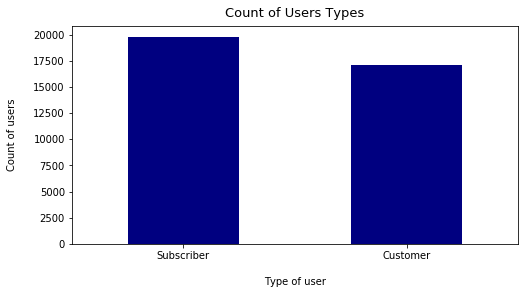

In [84]:
trips['usertype'].value_counts().plot(kind='bar', figsize=(8,4),color='navy')
plt.title('Count of Users Types', fontsize=13, y=1.015)
plt.xlabel('Type of user', labelpad=16)
plt.ylabel('Count of users', labelpad=16)
plt.xticks(rotation=360);

**Finding 3:** More users are an annual subscribers of the system, however, the differenece between the casual users and the subscribers are not sever.  

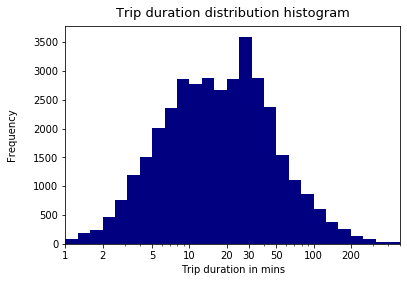

In [85]:
log_binsize = 0.1
trips['Mins'] = trips['tripduration'] / 60
bins = 10 ** np.arange(0, np.log10(trips['Mins'].max())+log_binsize, log_binsize)
plt.hist(data = trips, x = 'Mins', bins = bins,color='navy');
plt.xscale('log');
plt.xlim(1,500);
plt.xticks([1, 2, 5, 10, 20,30, 50, 100, 200], [1, 2, 5, 10, 20, 30,50, 100, 200]);
plt.title('Trip duration distribution histogram', fontsize=13, y=1.015)
plt.ylabel('Frequency', labelpad=16)
plt.xlabel('Trip duration in mins');

**Finding 4:** The average trip duration lies between 10 to 50 min, which is a big interval to determine the pattern of users. The distribution is normally distributed giving a mean of around 40 min of each trip. 

In [86]:
trips['Mins'].describe()

count    36921.000000
mean        38.276454
std        285.206091
min          1.016667
25%          8.266667
50%         17.450000
75%         34.883333
max      25906.616667
Name: Mins, dtype: float64

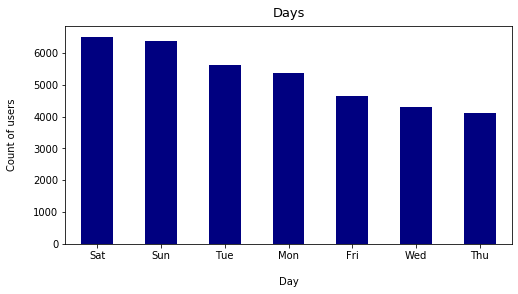

In [87]:
trips['day'].value_counts().plot(kind='bar', figsize=(8,4),color='navy')
plt.title('Days', fontsize=13, y=1.015)
plt.xlabel('Day', labelpad=16)
plt.ylabel('Count of users', labelpad=16)
plt.xticks(rotation=360);

**Finding 5:** The average trip duration lies between 10 to 50 min, which is a big interval to determine the pattern of users. The distribution is normally distributed giving a mean of around 40 min of each trip.

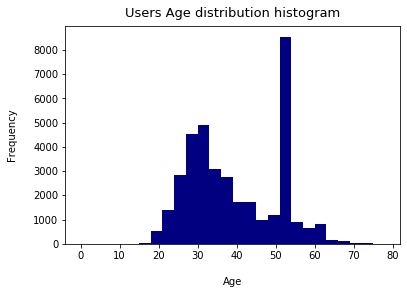

In [88]:
bin_edges = np.arange(0, trips['age'].max()+1, 3)
plt.hist(data = trips, x = 'age', bins = bin_edges,color='navy');
plt.title('Users Age distribution histogram', fontsize=13, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Frequency', labelpad=16);

**Finding 6:** The Average users age was observed to be between 25 and 35. However, there are a strike of users over the age of 50 resulting the mean users to lean over the right side of the distribution. 

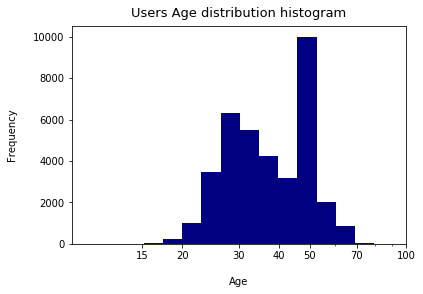

In [89]:
log_binsize = 0.06
bins = 10 ** np.arange(1, np.log10(trips['age'].max())+log_binsize, log_binsize)
plt.hist(data = trips, x = 'age', bins = bins, color='navy');
plt.xscale('log');
plt.xticks([15, 20, 30, 40, 50, 70,100], [15,20, 30, 40, 50, 70,100]);
plt.title('Users Age distribution histogram', fontsize=13, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Frequency', labelpad=16);

*This was a trial to change the scale of the distribution to a logarithmic scale, however, it leads the same observation as the linear scale.*

### The distribution(s) of variable(s) of interest, the unusual points and performed  transformations

> The transformations were already done in the wrangling part, such as the distance travelled by meters and the age of the customers. This results no further transformations in the data while the univariate exploration. Although there was some manipulation in the scales and axes in the distributions due to outliers and non-normal distributions. Also, some points were unusual in the age data which was the strike of customers over 50 years in the age histogram.

### Unusual distributions, performed operations on the data to tidy, adjust, or change the form of the data and why

> I did some calculations to get the distance traveled by each customer and the age of each customer. The only unusual distributions was the age distribution which reveals that most of the users are elder people over 50 years.

*************


<a id='bi'></a>

## Bivariate Exploration

> investigating relationships between pairs of variables.

In [90]:
bins= [19,20,30,40,50,60,70]
labels = ['>20','20-30','31-40','41-50','51-60', '>60']
trips['age_groups'] = pd.cut(trips['age'], bins=bins, labels=labels, right=False)
trips.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,age,distance(km),distance(m),day,Mins,age_groups
22996,1328,2020-06-20 15:27:36.141,2020-06-20 15:49:44.151,3269,Brunswick & 6th,40.726012,-74.050389,3639,Harborside,40.719252,...,42370,Customer,1991,male,29,1.555140,1555.139613,Sat,22.133333,20-30
16673,1196,2020-06-15 12:21:18.262,2020-06-15 12:41:15.239,3270,Jersey & 6th St,40.725289,-74.045572,3270,Jersey & 6th St,40.725289,...,40790,Subscriber,1976,female,44,0.000000,0.000000,Mon,19.933333,41-50
31239,1310,2020-06-26 18:16:51.688,2020-06-26 18:38:42.262,3184,Paulus Hook,40.714145,-74.033552,3275,Columbus Drive,40.718355,...,44345,Subscriber,1977,male,43,0.650684,650.683680,Fri,21.833333,41-50
14113,2572,2020-06-13 16:38:46.740,2020-06-13 17:21:39.453,3694,Jackson Square,40.711130,-74.078900,3277,Communipaw & Berry Lane,40.714358,...,42550,Customer,1969,unknown,51,1.096222,1096.222072,Sat,42.866667,51-60
4728,724,2020-06-06 14:37:28.457,2020-06-06 14:49:33.456,3206,Hilltop,40.731169,-74.057574,3187,Warren St,40.721124,...,42448,Customer,1969,unknown,51,1.988492,1988.492037,Sat,12.066667,51-60
7730,5708,2020-06-08 10:53:56.738,2020-06-08 12:29:05.453,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,...,42215,Customer,1969,unknown,51,0.000000,0.000000,Mon,95.133333,51-60
20011,1875,2020-06-18 08:36:53.600,2020-06-18 09:08:08.660,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,42307,Subscriber,1973,male,47,0.000000,0.000000,Thu,31.250000,41-50
16425,1759,2020-06-15 01:13:27.017,2020-06-15 01:42:46.181,3638,Washington St,40.724294,-74.035483,3184,Paulus Hook,40.714145,...,41066,Customer,1986,unknown,34,1.140154,1140.154089,Mon,29.316667,31-40
5699,266,2020-06-06 22:15:53.066,2020-06-06 22:20:19.318,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,42591,Subscriber,1993,female,27,0.000000,0.000000,Sat,4.433333,20-30
3895,1036,2020-06-05 17:31:27.666,2020-06-05 17:48:44.237,3280,Astor Place,40.719282,-74.071262,3792,Columbus Dr at Exchange Pl,40.716870,...,42151,Subscriber,1978,male,42,3.251722,3251.721896,Fri,17.266667,41-50


> from: https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas#:~:text=If%20age%20>%3D%200%20%26%20age,so%20on%20.....

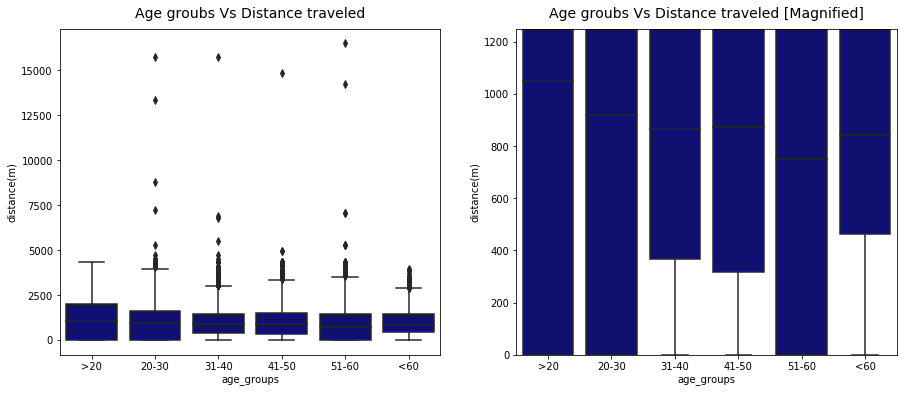

In [91]:
size = (15, 6)
fig, ax = plt.subplots(1, 2,figsize=size)
sb.boxplot(data = trips, x = 'age_groups', y = 'distance(m)', color = 'navy',  ax=ax[0]);
sb.boxplot(data = trips, x = 'age_groups', y = 'distance(m)', color = 'navy',  ax=ax[1]);
ax[0].set_title('Age groubs Vs Distance traveled', fontsize=14, y=1.015)
ax[1].set_title('Age groubs Vs Distance traveled [Magnified]', fontsize=14, y=1.015)
ax[1].set_ylim(0,1250);

**Finding 7:** The mean distance traveled by users (from the magnified version) appears to be between 800 meters and 1100 meters, which is relatively close. In general, they decrease as the age increases. So ages under 20 has the highest mean followed by the other age groups expect for the group of sixties which breaks the patter and record an average close to the mid-aged groups. Also, the overall graph shows that the age groups of twenties and fifties have an extreme outliers which will affect the final conclusion when calculating the average distance traveled by each group.

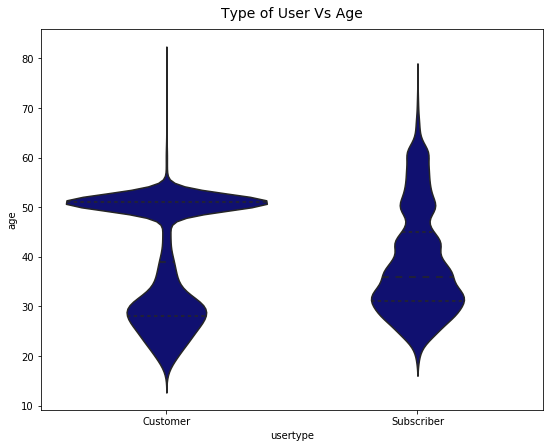

In [92]:
size = (9, 7)
fig, ax = plt.subplots(figsize=size)
sb.violinplot(data = trips, x = 'usertype', y= 'age', color = 'navy' , inner = 'quartile')
ax.set_title('Type of User Vs Age', fontsize=14, y=1.015);


**Finding 8:** The violin plot shows that most subscribers fall between the ages of 25 and 35 and causal customers are mostly people over 50 years. Which suggests that young people are more likely to buy the annual subscription and elder people likes to use the system day by day. 

Text(0.5, 1.015, 'Type of User Vs Age')

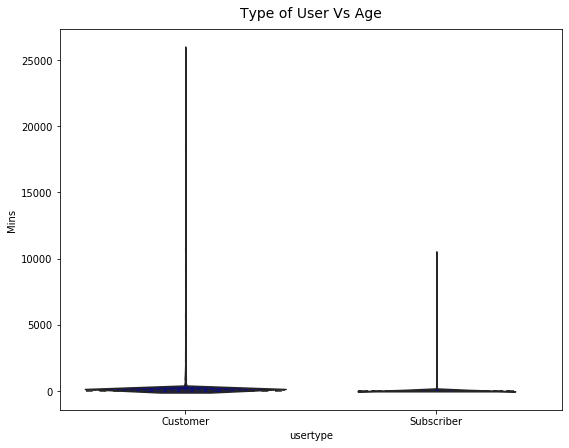

In [127]:
size = (9, 7)
fig, ax = plt.subplots(figsize=size)
sb.violinplot(data = trips, x = 'usertype', y= 'Mins', color = 'navy' , inner = 'quartile')
ax.set_title('Type of User Vs Age', fontsize=14, y=1.015);

**Finding 9:** Casual Customers’ rides are longer than subscribers

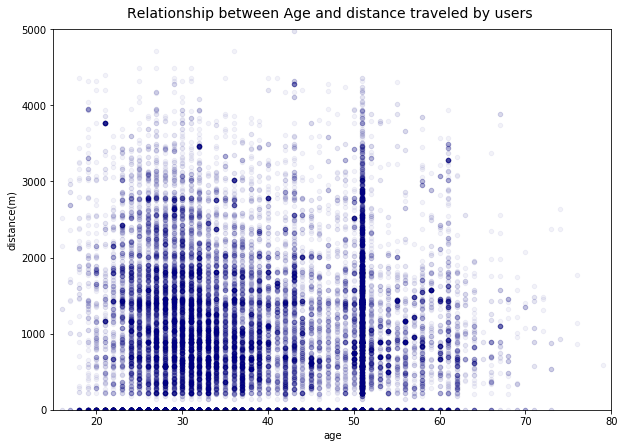

In [93]:
size = (10, 7)
fig, ax = plt.subplots(figsize=size)
ax = plt.subplot(111)
trips.plot(x='age',y='distance(m)',ax=ax, kind='scatter', alpha = 1/20,color='navy')
ax.set_title('Relationship between Age and distance traveled by users ', fontsize=14, y=1.015)
ax.set_xlim(15,80)
ax.set_ylim(0,5000);

**Finding 10:** The relationship is not obvious as there is not clear over-plotting in the graph which I tried to handle as much as possible. The graph shows a clustering in users over the age of 50.

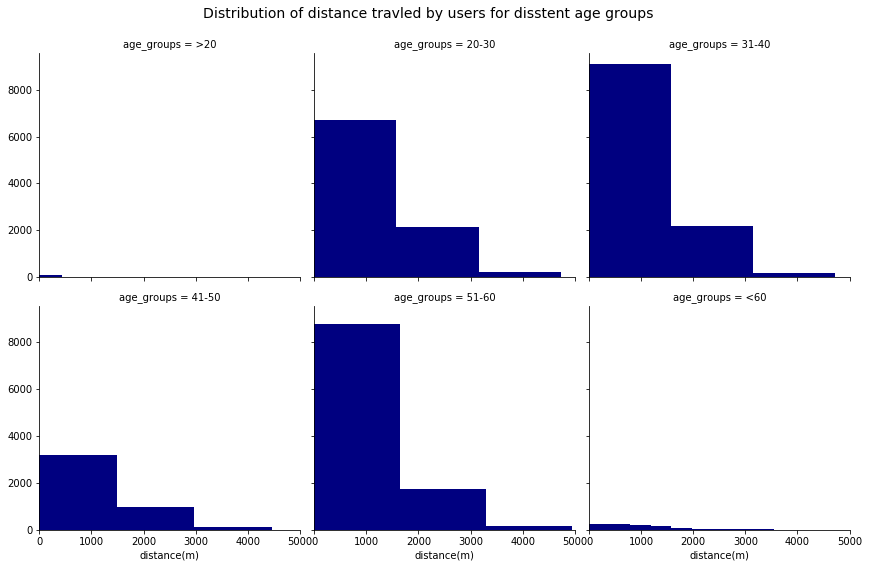

In [94]:
d = {'color': ['navy']}
g = sb.FacetGrid(data = trips, col = 'age_groups', col_wrap = 3, height=4, aspect=1,  hue_kws=d)                 
g.map(plt.hist, "distance(m)")
g.set(xlim=(0, 5000))
g.fig.suptitle('Distribution of distance travled by users for disstent age groups', size = 14)
g.fig.subplots_adjust(top=0.9);

**Finding 11:** The distributions shows that overall traveled distance are at the peak with people in 30s and 50s. Also, it’s at least with people younger than 20. Which most probably affected by the number of users in every group affecting the overall result of distance traveled by each group.

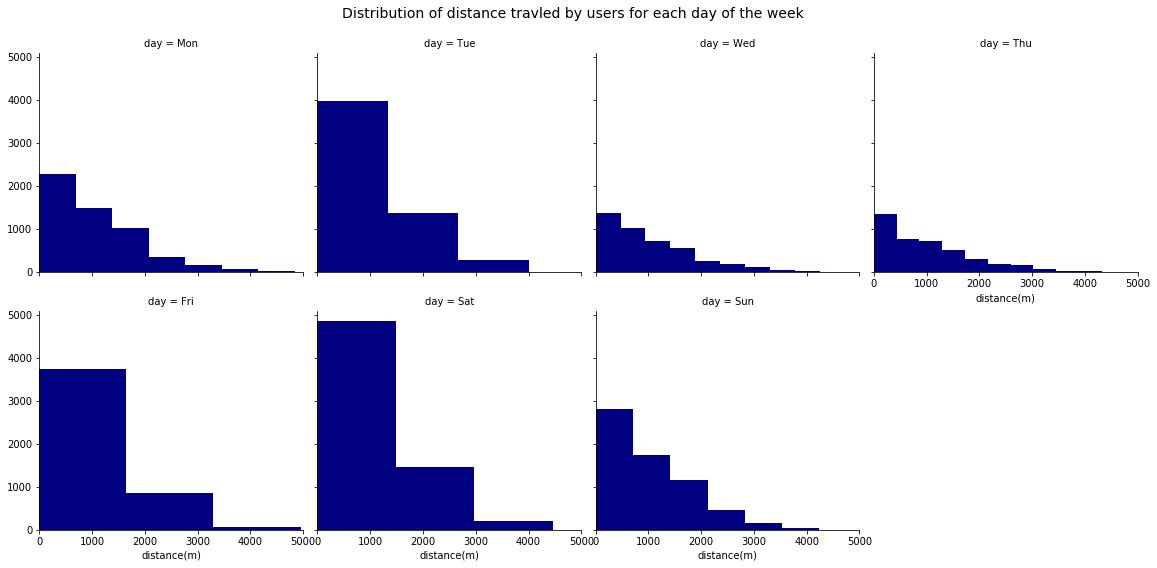

In [95]:
g = sb.FacetGrid(data = trips, col = 'day', col_wrap = 4, height=4, aspect=1, hue_kws=d)
g.map(plt.hist, 'distance(m)');
g.set(xlim=(0, 5000))
g.fig.suptitle('Distribution of distance travled by users for each day of the week', size = 14)
g.fig.subplots_adjust(top=0.9);

**Finding 12:** The distributions shows that overall traveled distance are at the peak on Saturday, which is a weekend. Also, it’s high at Tuesday and Friday followed by the rest of week days which have relatively low frequency. All The distributions are positively skewed.

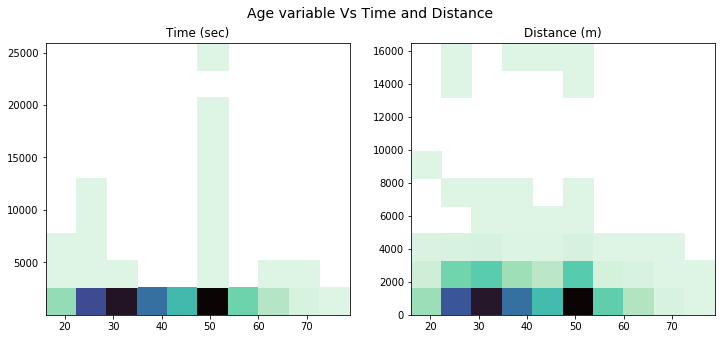

In [96]:
fig, axs = plt.subplots(1, 2, figsize = [12,5])
g = axs[0].hist2d(data = trips, x = 'age', y = 'Mins', cmin = 0.5, cmap="mako_r")
h =axs[1].hist2d(data = trips, x = 'age', y = 'distance(m)', cmin = 0.5, cmap="mako_r")
fig.suptitle('Age variable Vs Time and Distance', size = 14)
axs[0].set_title('Time (sec)')
axs[1].set_title('Distance (m)');

**Finding 13:**  It appears that people around the age of 50 scores more distance and consequently more time in trips followed by users around the age of 30.

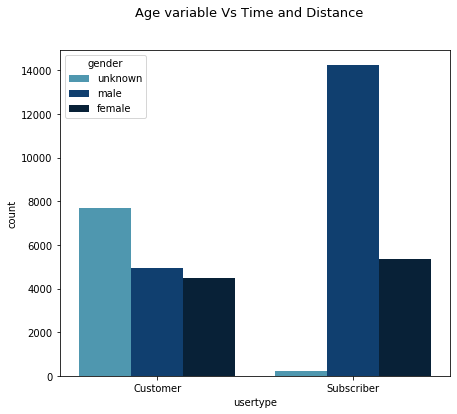

In [97]:
fig, ax = plt.subplots(figsize=(7, 6))
sb.countplot(data = trips, x='usertype' ,hue = 'gender', palette="ocean_r")
fig.suptitle('Age variable Vs Time and Distance', size = 13);

**Finding 14:** The greatest number of subscribers are males with a notable difference from other categories. Females are the least dominant number of casual customers, but the ratio between other categories are not big. So that the advertising of long-term subscription should focus more on males and the casual users targeting should be more generic.

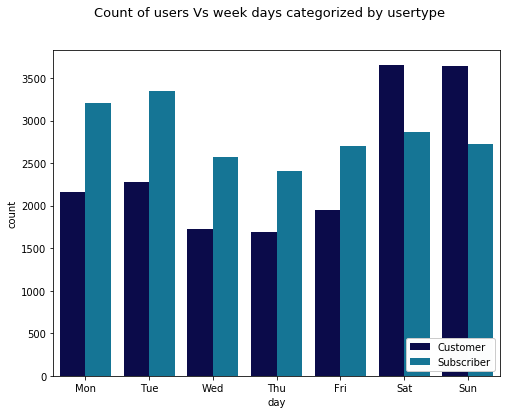

In [98]:
size = (8,6)
fig, ax = plt.subplots(figsize= size)
ax = sb.countplot(data = trips, x='day' ,hue = 'usertype', palette="ocean")
ax.legend(loc = 4, ncol = 1, framealpha =3)
fig.suptitle('Count of users Vs week days categorized by usertype', size = 13);

**Finding 15:** The bar plot indicates that the number of causal customers increases in the weekends and decrease in the weekdays in comparison to the subscribers number, which is increasing in the weekdays and decrease in the weekends. This suggests that subscribers use the system in their daily life like work or school and the causal users uses the bike system for leisure or inconsistant trips.

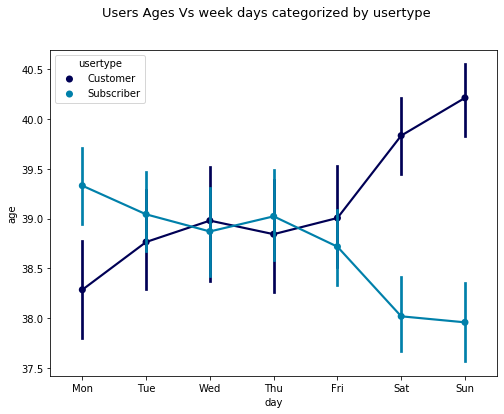

In [99]:
fig, ax = plt.subplots(figsize=size)
sb.pointplot(data=trips, x='day', y='age', hue = 'usertype', scale=.8, palette="ocean")
fig.suptitle('Users Ages Vs week days categorized by usertype', size = 13);

**Finding 16:** The plot indicates that casual customers in elder age increase in the weekends and decrease in the weekdays. On the other hand the subscribers in younger age increase in weekday and decrease in weekends. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The observations in this part showed that most of the casual customers tend to use the bike system in vacations and weekends for fun, and the subscribers use the system in the normal week days which suggests that they use the system for work or school. The data also showed that Most of the subscribers are males and fewest customers are females. The subscribers tend to be in younger age from the casual users as the data showed that subscribers are mostly in the range between 20s and middle 30s unlike the casual customers who most of are above 50.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between the age and the distance traveled and the trip duration was inconclusive and doesn’t have a defiant pattern. However, it was noticed that causal customers trips are longer than subscribers.

<a id='multi'></a>
## Multivariate Exploration

> Createting plots of three or more variables to investigate the data even further.

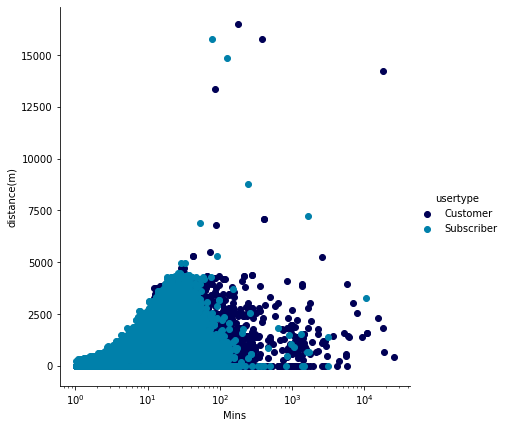

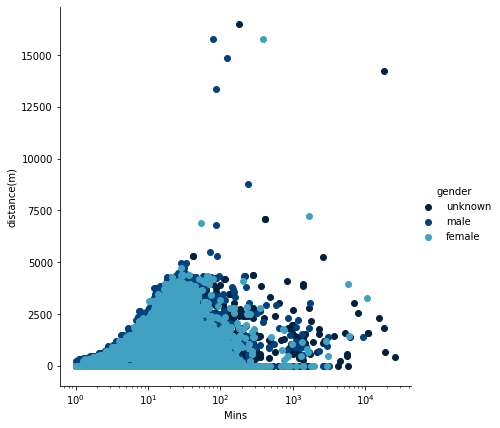

In [118]:
k = sb.FacetGrid(data = trips, hue = 'usertype', height = 6, palette="ocean")
k.map(plt.scatter, 'Mins','distance(m)').add_legend()
k.set(xscale = 'log');

g = sb.FacetGrid(data = trips, hue = 'gender', height = 6, palette="ocean")
g.map(plt.scatter, 'Mins','distance(m)').add_legend()
g.set(xscale = 'log');

**Finding 17:** The scatter plot doesn’t show an obvious correlation. However, we can deduce a positive correlation from the beginning to the mean of the trip duration which is 38 min , and a negative correlation the mean of 38 min from to maximum traveled duration. This deduction is applied to the different genders and the different user types.

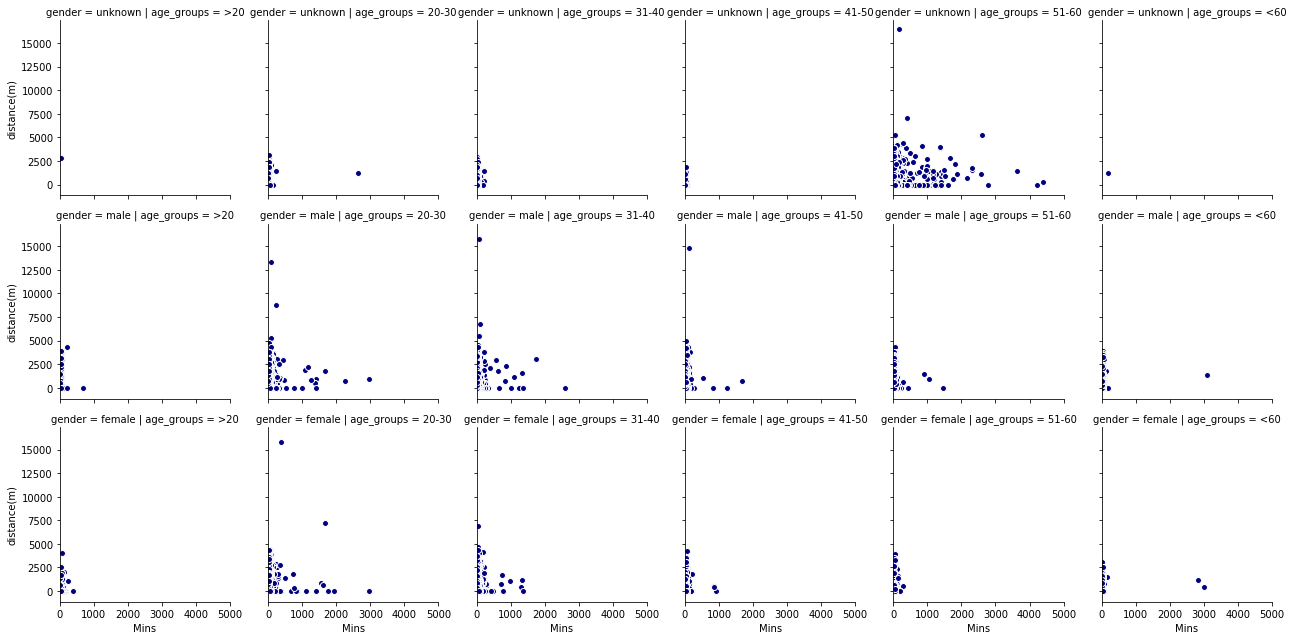

In [101]:
g = sb.FacetGrid(trips, col="age_groups",  row="gender",  hue_kws=d)
g = g.map(plt.scatter, "Mins", "distance(m)", edgecolor="w")
g.set(xlim=(0, 5000));

**Finding 18:** These plots confirms the previous conclusion of having no corelation between distance and age. The results are having no pattern in the relationship between the distance traveled and the trip duration which -obviously should be positively corelated, however, the ticks of the plots are not very accurate and need further investigation. The data also shows that there are clusters in the ages of 20s, 30s and 50s. Which also confirms the fact of clustered ages of customers and subscribers, especially males.

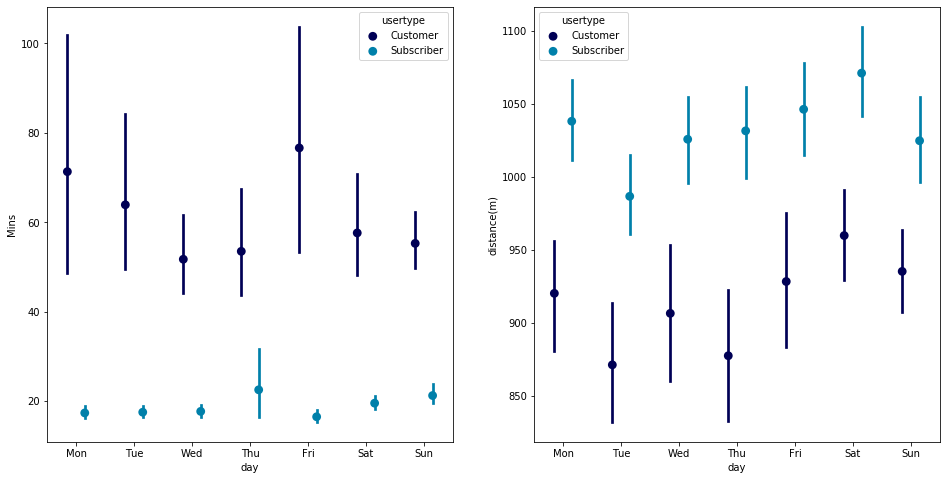

In [102]:
fig, ax = plt.subplots(1,2, figsize = [16,8] )

sb.pointplot(data = trips, x = 'day', y = 'Mins', hue = 'usertype', dodge = 0.3, linestyles = "",  ax=ax[0], palette="ocean")
sb.pointplot(data = trips, x = 'day', y = 'distance(m)', hue = 'usertype', dodge = 0.3, linestyles = "", ax=ax[1], palette="ocean");

**Finding 19:** This graph shows that customers tend to have a longer trip duration than subscribers, however, they also take lower distances. This suggests that the distance traveled are not positively corelated with the trip duration. This may be assigned to the fact that subscriber have more flexibility and practice with the bikes giving them the advantage of quick trips with long distances unlike the casual customers who may only use the bikes for fun.

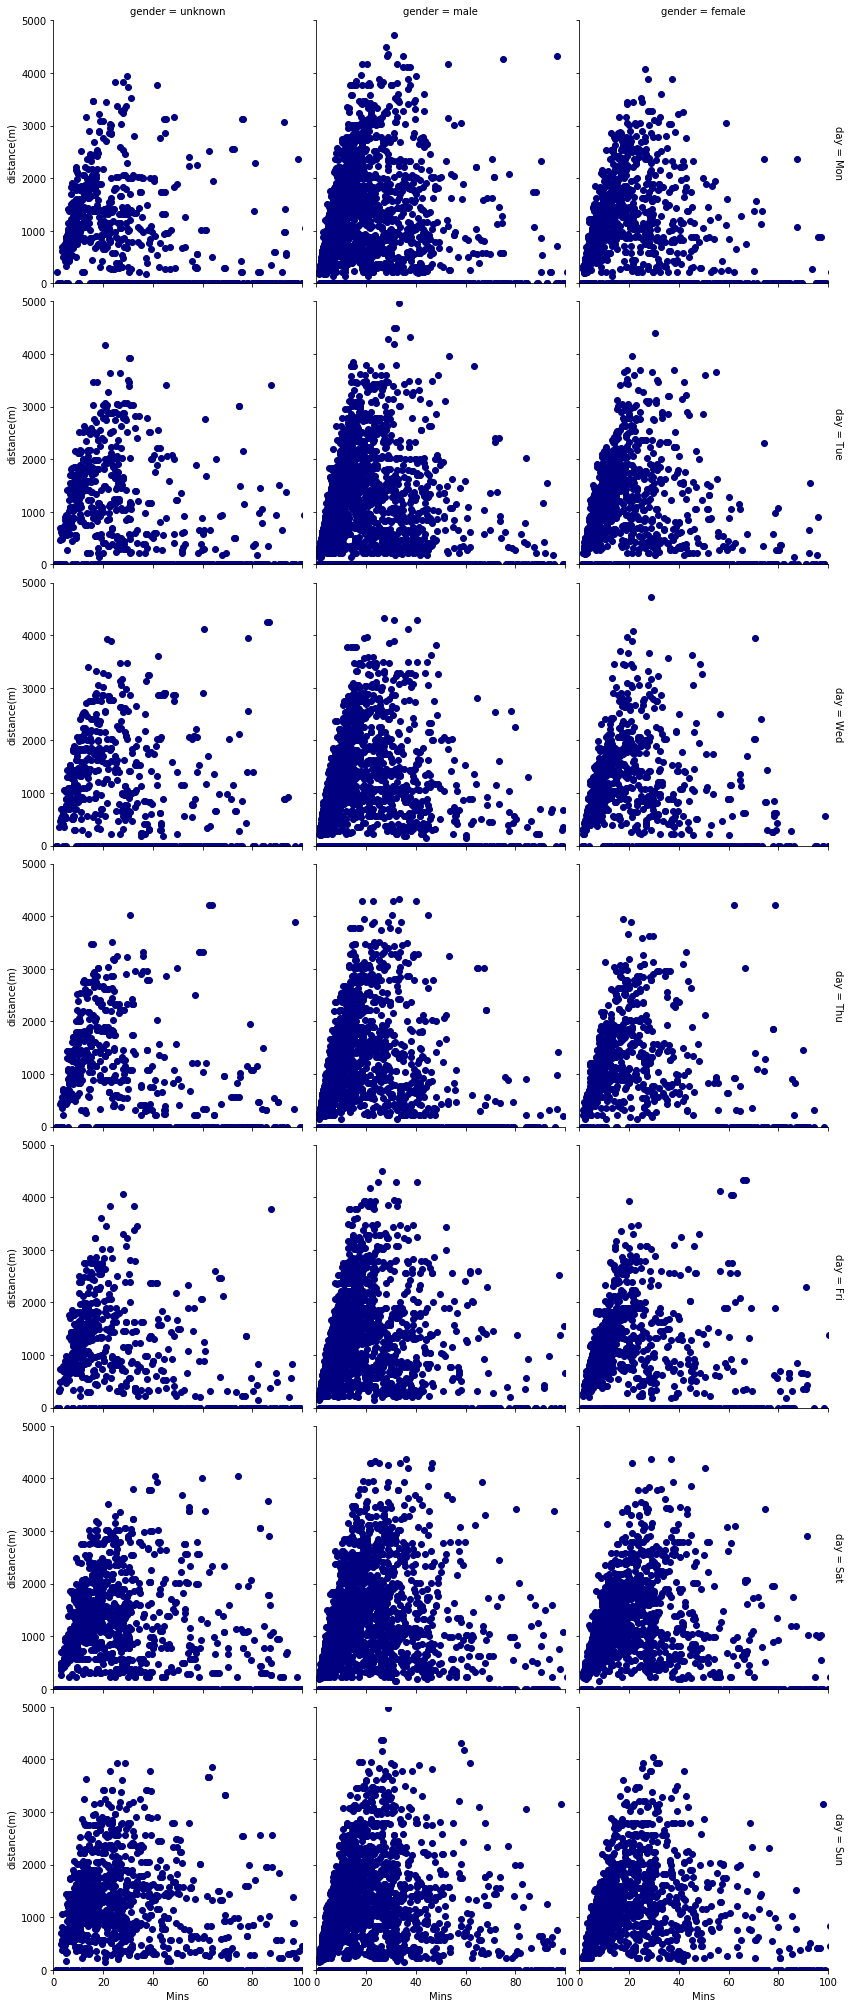

In [128]:
g = sb.FacetGrid(data = trips, col = 'gender', row = 'day', height = 4,margin_titles = True, hue_kws=d)
g.map(plt.scatter, 'Mins', 'distance(m)');
g.set(xlim=(0, 100));
g.set(ylim=(0, 5000));

**Finding 20:** The scatter plots shows a positive relationship between the distance and the trip duration espically in the males group. 

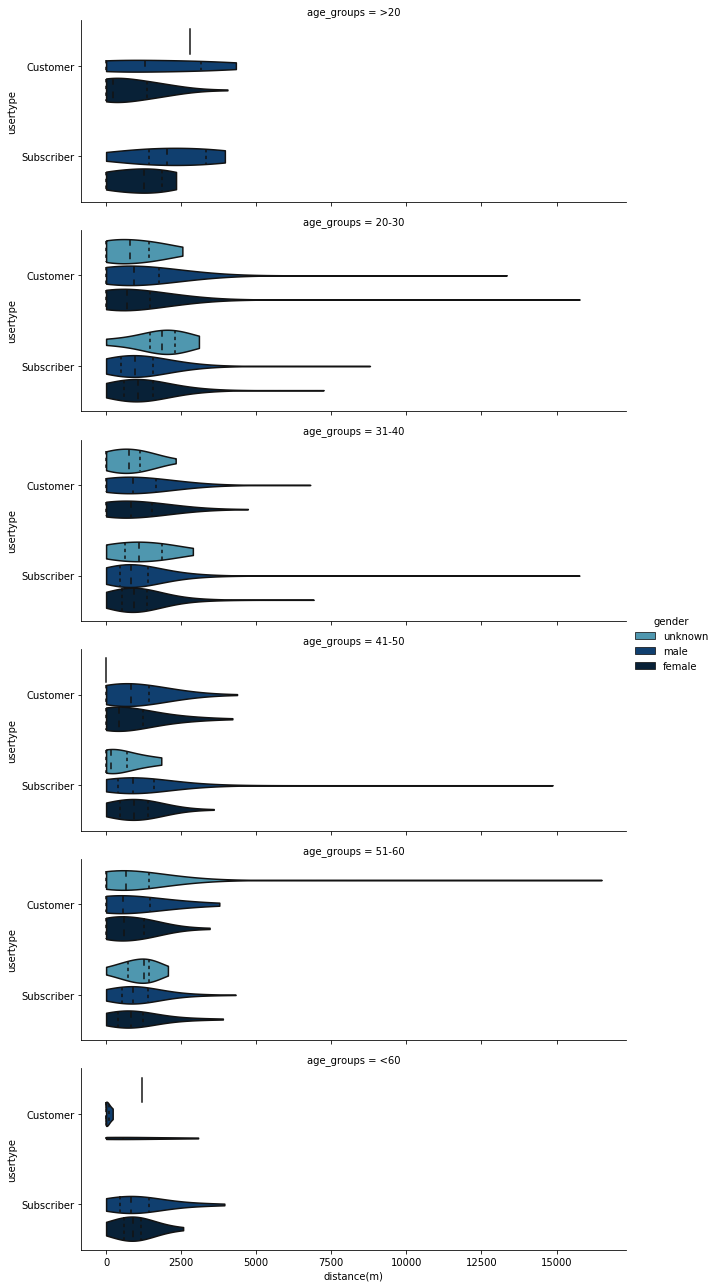

In [104]:
g = sb.catplot(x="distance(m)", y="usertype",
                hue="gender", row="age_groups",
                data=trips[trips.usertype.notnull()], height=3, aspect=3, palette="ocean_r",
                kind="violin", dodge=True, cut=0, bw=1, inner ='quartile')

**Finding 21:** There are some age groups the miss female customers such as below that 20 years old and above 60 years old groups. Males dominate the overall customers and the age groups of 20s and 30s have a lot of outliers in the subscribers type group. Furthermore, this outliers can be seen also in the age group of 50s but in the casual customers type.

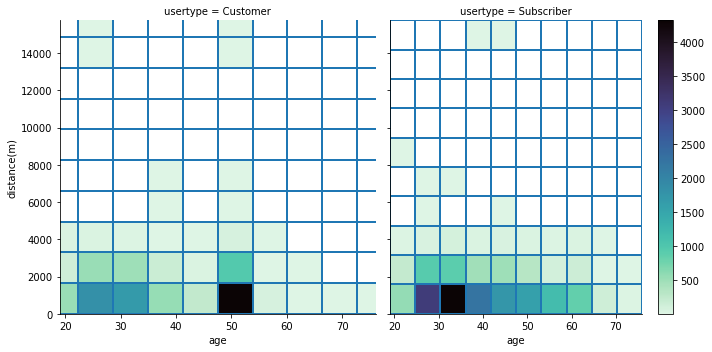

In [130]:
g = sb.FacetGrid(data = trips, col = 'usertype', height = 5)
g.map(plt.hist2d, 'age','distance(m)',cmin=0.3,cmap = 'mako_r')
plt.colorbar();

**Finding 22:** This heat map confirms the fact that the casual customers are mostly above 50 subscribers are between mis 20s and 30s which all have their traveled distance less than 200 meters. Subscribers shows more concentration in distances above 4000 metres relative to causal customers in the same ages.

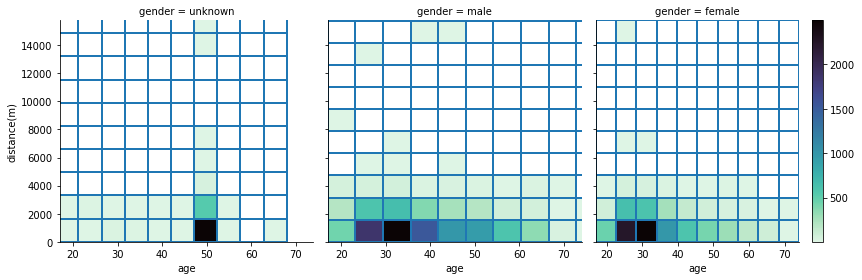

In [105]:
g = sb.FacetGrid(data = trips, col = 'gender',height = 4)
g.map(plt.hist2d, 'age','distance(m)',cmin=0.1,cmap = 'mako_r');
plt.colorbar();

**Finding 23:** This heat map confirms the fact that users are clustered between mid 20s, 30s, and 50s. It also gives information about the genders of those clustered slices. So the ages of mid 20s are mostly females in which we previously showed that females are the least users of the bike systems. So that we can suggest that the cluster of mid 20s users comes in the third place after the big cluster of 50s users and 30s users. 

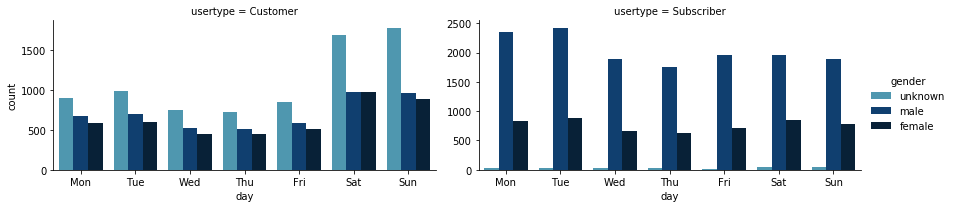

In [107]:
graph = sb.catplot(data=trips, x='day', col="usertype", hue="gender", kind='count', sharey = False, height=3, aspect=2, palette="ocean_r");

**Finding 24:** This bar chart confirms the fact that most of the subscribers are males and females are the least users of the system. Also, it confirms that most of the overall casual users focus on weekends and subscribers are clustered more in the normal week days. However, it shows that distribution of these genders and types of users on every week day in which you can notice a peak on Tuesday than any other day for subscribers and also on the used weekdays of casual users.

**************
<a id='conc'></a>
## Conclusion

### The relationships  observed in this part of the investigation and the features that strengthened each other in terms of looking at your feature(s) of interest

> This section was a further investigation of the previous two parts. The unobvious pattern was investigated and studied more efficiently than the last parts. The data confirmed all the investigations in the previous sections and amplified the results and observations were made clearer and more detailed. The general patterns are the same such as the day usage of the customers and subscribers which is inverted in the two groups. Also the age groups who clusters in the casual customers at 50s and in the subscribers at younger ages. The addition of variables life distance and time to these variables showed the habits of the groups, their abilities to travel, and their extremes. 

### Interesting or surprising interactions between features

> The relationship between the distance traveled and the trip duration was an interesting finding. As I thought as the first it should be always a positive correlation between distance and time. However, the data showed that there are no obvious relation between the two variables especially between ages groups. After more investigation the data showed that that the distance and the time may have a negative relationship if we compare them relative to the customer type. So after magnifying all the results it showed that the general pattern of the relationship between distance and time is a positive relationship. However, when it comes to user type, the time travelled by the subscribers can be less than the customers with the same distance. So the correlation between them may seem to be negative relative to the two groups. However, in general it's not exactly like this.